# DATA VISION

### Importing Libraries

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings

# Machine Learning
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

### Loading Dataset

In [100]:
df=pd.read_csv('students.csv')
df

,Marital Status,Application Mode,Application Order,Course Name,Daytime/Evening Attendance,Previous Qualification,Nationality,Mother's Qualification,Father's Qualification,Mother's Occupation,...,Credited Units (2nd Sem),Enrolled Units (2nd Sem),Evaluated Units (2nd Sem),Approved Units (2nd Sem),Average Grade (2nd Sem),Not Evaluated Units (2nd Sem),Unemployment Rate (%),Inflation Rate (%),GDP per Capita (USD),Student Status
0,Single,2nd phase—general contingent,5,Animation and Multimedia Design,Daytime,Secondary education,Portuguese,General commerce course,Other—11th Year,Service/Sales/Security,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International student (bachelor),1,Tourism,Daytime,Secondary education,Portuguese,Secondary Education,Higher Education Degree,Technicians & Professionals,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st phase—general contingent,5,Communication Design,Daytime,Secondary education,Portuguese,Administration & Commerce course,Basic Edu 1st Cycle,Unskilled Workers,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd phase—general contingent,2,Journalism and Communication,Daytime,Secondary education,Portuguese,Accounting & Admin course,Basic Edu 1st Cycle,Service/Sales/Security,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 years old,1,Social Service (evening attendance),Evening,Secondary education,Portuguese,Administration & Commerce course,Basic Edu 2nd Cycle,Unskilled Workers,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Single,1st phase—general contingent,6,Journalism and Communication,Daytime,Secondary education,Portuguese,Secondary Education,Secondary Education,Service/Sales/Security,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,Single,1st phase—general contingent,2,Journalism and Communication,Daytime,Secondary education,Russian,Secondary Education,Secondary Education,Unskilled Workers,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,Single,1st phase—general contingent,1,Nursing,Daytime,Secondary education,Portuguese,Administration & Commerce course,Basic Edu 1st Cycle,Unskilled Workers,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,Single,1st phase—general contingent,1,Management,Daytime,Secondary education,Portuguese,Administration & Commerce course,Basic Edu 1st Cycle,Skilled Industry Workers,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


### Basic EDA

In [101]:
df.isnull().sum()

Marital Status                   0
Application Mode                 0
Application Order                0
Course Name                      0
Daytime/Evening Attendance       0
Previous Qualification           0
Nationality                      0
Mother's Qualification           0
Father's Qualification           0
Mother's Occupation              0
Father's Occupation              0
Displaced Student                0
Special Educational Needs        0
Is Debtor                        0
Tuition Fees Up-to-Date          0
Gender (1=Male, 0=Female)        0
Scholarship Holder               0
Age at Enrollment                0
International Student            0
Credited Units (1st Sem)         0
Enrolled Units (1st Sem)         0
Evaluated Units (1st Sem)        0
Approved Units (1st Sem)         0
Average Grade (1st Sem)          0
Not Evaluated Units (1st Sem)    0
Credited Units (2nd Sem)         0
Enrolled Units (2nd Sem)         0
Evaluated Units (2nd Sem)        0
Approved Units (2nd 

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Marital Status                 4424 non-null   object 
 1   Application Mode               4424 non-null   object 
 2   Application Order              4424 non-null   int64  
 3   Course Name                    4424 non-null   object 
 4   Daytime/Evening Attendance     4424 non-null   object 
 5   Previous Qualification         4424 non-null   object 
 6   Nationality                    4424 non-null   object 
 7   Mother's Qualification         4424 non-null   object 
 8   Father's Qualification         4424 non-null   object 
 9   Mother's Occupation            4424 non-null   object 
 10  Father's Occupation            4424 non-null   object 
 11  Displaced Student              4424 non-null   object 
 12  Special Educational Needs      4424 non-null   o

#### OHE

In [103]:
_yes_no = {'yes','no'}

yesno_cols = [
    col for col in df.columns
    if df[col].dropna().astype(str).str.strip().str.lower().isin(_yes_no).all()
]

df[yesno_cols] = df[yesno_cols].apply(
    lambda s: s.astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0}).astype('Int64')
)

print("Converted columns:", yesno_cols)
df[yesno_cols].head()

Converted columns: ['Displaced Student', 'Special Educational Needs', 'Is Debtor', 'Tuition Fees Up-to-Date', 'Scholarship Holder', 'International Student']


,Displaced Student,Special Educational Needs,Is Debtor,Tuition Fees Up-to-Date,Scholarship Holder,International Student
0,1,0,0,1,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,1,0,0
4,0,0,0,1,0,0


#### Label Encoder

In [104]:
df['Gender (1=Male, 0=Female)'] = df['Gender (1=Male, 0=Female)'].map({'Male': 1, 'Female': 0})

In [105]:
df

,Marital Status,Application Mode,Application Order,Course Name,Daytime/Evening Attendance,Previous Qualification,Nationality,Mother's Qualification,Father's Qualification,Mother's Occupation,...,Credited Units (2nd Sem),Enrolled Units (2nd Sem),Evaluated Units (2nd Sem),Approved Units (2nd Sem),Average Grade (2nd Sem),Not Evaluated Units (2nd Sem),Unemployment Rate (%),Inflation Rate (%),GDP per Capita (USD),Student Status
0,Single,2nd phase—general contingent,5,Animation and Multimedia Design,Daytime,Secondary education,Portuguese,General commerce course,Other—11th Year,Service/Sales/Security,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International student (bachelor),1,Tourism,Daytime,Secondary education,Portuguese,Secondary Education,Higher Education Degree,Technicians & Professionals,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st phase—general contingent,5,Communication Design,Daytime,Secondary education,Portuguese,Administration & Commerce course,Basic Edu 1st Cycle,Unskilled Workers,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd phase—general contingent,2,Journalism and Communication,Daytime,Secondary education,Portuguese,Accounting & Admin course,Basic Edu 1st Cycle,Service/Sales/Security,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 years old,1,Social Service (evening attendance),Evening,Secondary education,Portuguese,Administration & Commerce course,Basic Edu 2nd Cycle,Unskilled Workers,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Single,1st phase—general contingent,6,Journalism and Communication,Daytime,Secondary education,Portuguese,Secondary Education,Secondary Education,Service/Sales/Security,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,Single,1st phase—general contingent,2,Journalism and Communication,Daytime,Secondary education,Russian,Secondary Education,Secondary Education,Unskilled Workers,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,Single,1st phase—general contingent,1,Nursing,Daytime,Secondary education,Portuguese,Administration & Commerce course,Basic Edu 1st Cycle,Unskilled Workers,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,Single,1st phase—general contingent,1,Management,Daytime,Secondary education,Portuguese,Administration & Commerce course,Basic Edu 1st Cycle,Skilled Industry Workers,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [106]:
df['Student Status'] = df['Student Status'].map({
    'Dropout':1,
    'Enrolled':0,
    'Graduate':0
})

### ADVANCED FEATURE ENGINEERING

In [107]:
# A. Academic Success Ratios (Crucial for Accuracy)

df['ApprovalRate_1st'] = df['Approved Units (1st Sem)'] / df['Enrolled Units (1st Sem)'].replace(0, 1)
df['ApprovalRate_2nd'] = df['Approved Units (2nd Sem)'] / df['Enrolled Units (2nd Sem)'].replace(0, 1)

In [108]:
# B. Grade Trajectory (Is the student improving or failing?)
df['Grade_Change'] = df['Average Grade (2nd Sem)'] - df['Average Grade (1st Sem)']

In [109]:
# C. Total Academic Load & Performance
df['Total_Approved'] = df['Approved Units (1st Sem)'] + df['Approved Units (2nd Sem)']
df['Total_Enrolled'] = df['Enrolled Units (1st Sem)'] + df['Enrolled Units (2nd Sem)']
df['Overall_ApprovalRate'] = df['Total_Approved'] / df['Total_Enrolled'].replace(0, 1)

In [110]:
# D. High Risk Flag (Custom Heuristic)
df['High_Risk_Flag'] = ((df['Is Debtor'] == 1) & (df['Overall_ApprovalRate'] < 0.5)).astype(int)

In [111]:
# E. Interaction Features
df['Financial_Stability_Index'] = df['Tuition Fees Up-to-Date'].astype(int) + df['Scholarship Holder'].astype(int)

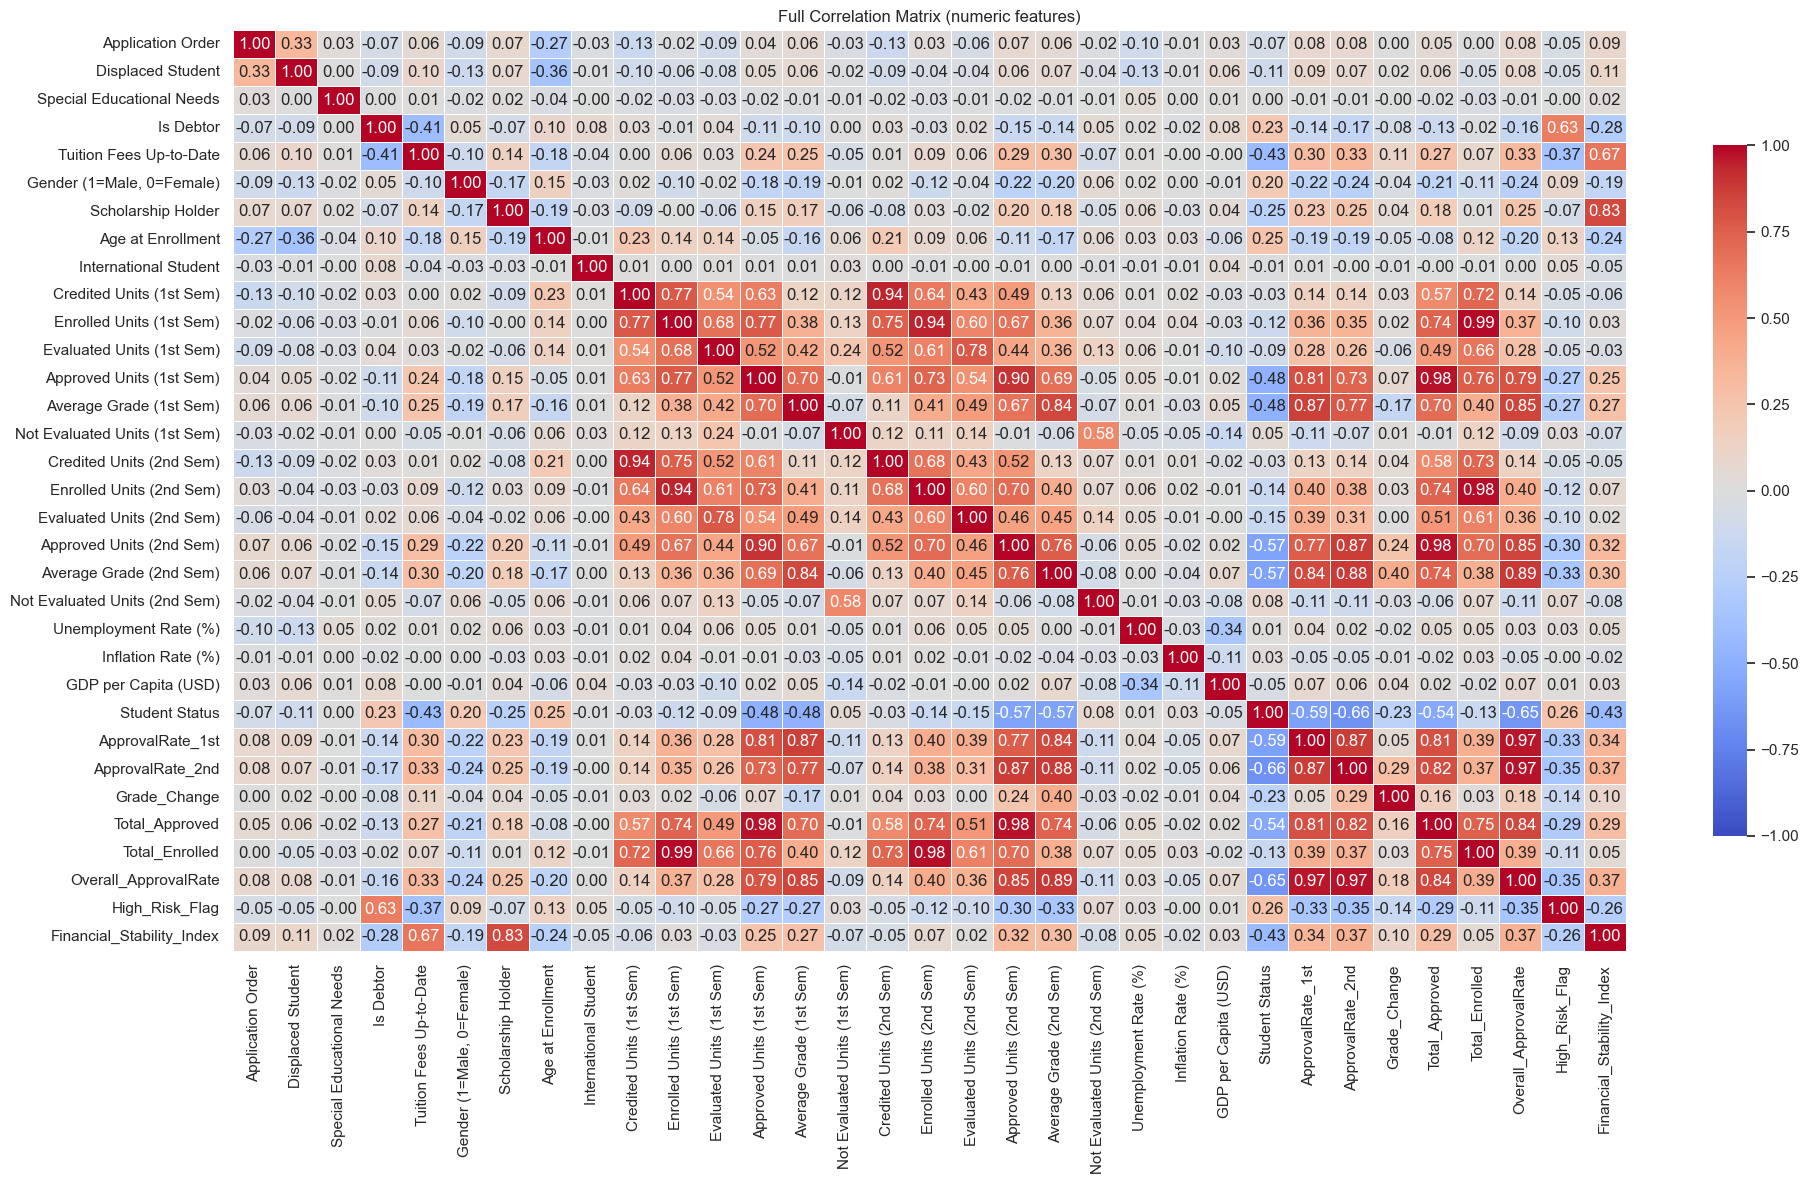

In [112]:
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(
    corr, annot=True, fmt=".2f", cmap='coolwarm',
    vmin=-1, vmax=1, linewidths=.5, cbar_kws={"shrink": .75}
)
plt.title("Full Correlation Matrix (numeric features)")
plt.tight_layout()
plt.show()

In [113]:
df_clean = df.copy()
target_col = 'Student Status'

### Imp Graphs

In [114]:
num_cols = df_clean.select_dtypes(include=['int64', 'float64', 'Int64']).columns.drop(target_col)
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns

#### Univariate Analysis Graphs

In [ ]:
def plot_num_vs_target(col):
    
    sns.histplot(data=df_clean, x=col, hue=target_col, multiple='stack')
    plt.title(f"{col} distribution by {target_col}")
    plt.show()

for col in num_cols:
    plot_num_vs_target(col)

#### Bi-variate Analysis Graphs


 Marital Status vs Student Status (row %)


Student Status,0,1
Marital Status,,
Divorced,0.538,0.462
Facto Union,0.560,0.440
Legally Separated,0.333,0.667
Married,0.528,0.472
Single,0.698,0.302
Widower,0.750,0.250


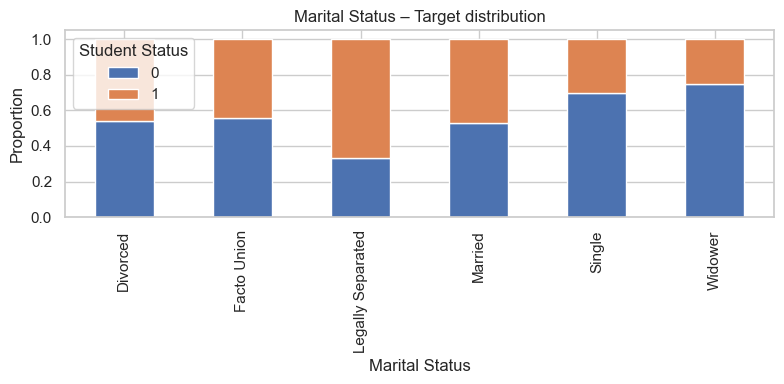


 Application Mode vs Student Status (row %)


Student Status,0,1
Application Mode,,
1st phase—general contingent,0.798,0.202
1st phase—special contingent (Azores Island),0.875,0.125
1st phase—special contingent (Madeira Island),0.868,0.132
2nd phase—general contingent,0.706,0.294
3rd phase—general contingent,0.637,0.363
Change in course,0.631,0.369
Change in institution/course,0.661,0.339
Change in institution/course (International),1.000,0.000
Holders of other higher courses,0.388,0.612


C:\Users\mahes\AppData\Local\Temp\ipykernel_920\396040500.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


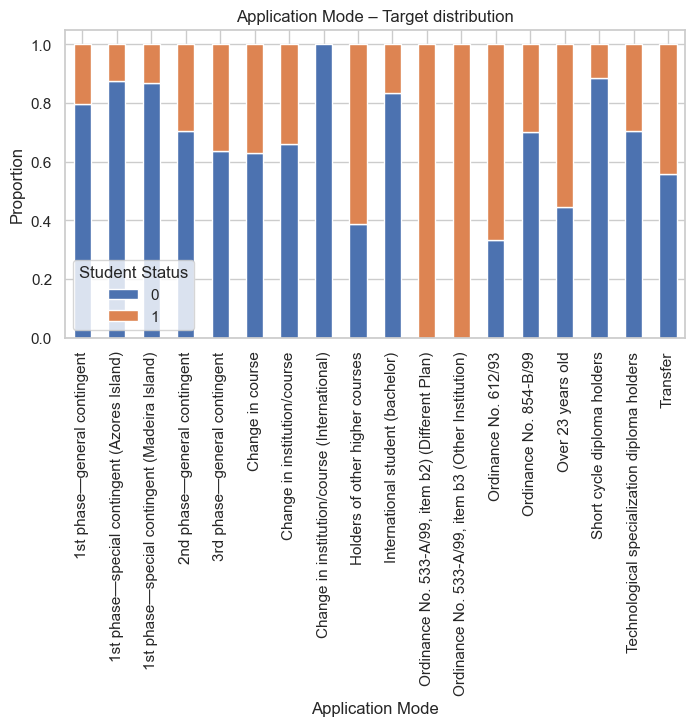


 Course Name vs Student Status (row %)


Student Status,0,1
Course Name,,
Advertising and Marketing Management,0.646,0.354
Agronomy,0.590,0.410
Animation and Multimedia Design,0.619,0.381
Basic Education,0.557,0.443
Biofuel Production Technologies,0.333,0.667
Communication Design,0.774,0.226
Equiniculture,0.447,0.553
Informatics Engineering,0.459,0.541
Journalism and Communication,0.695,0.305


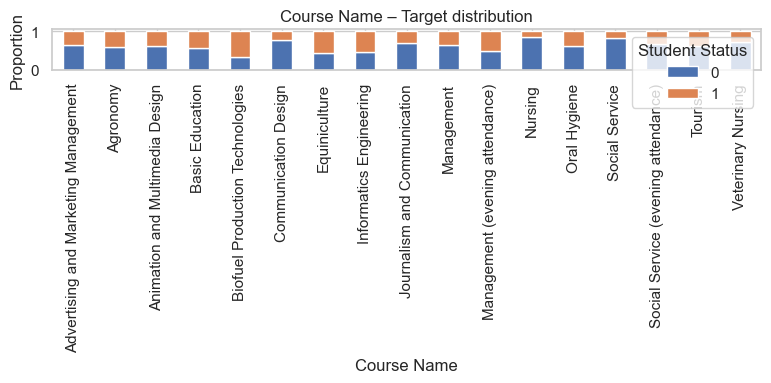


 Daytime/Evening Attendance vs Student Status (row %)


Student Status,0,1
Daytime/Evening Attendance,,
Daytime,0.692,0.308
Evening,0.571,0.429


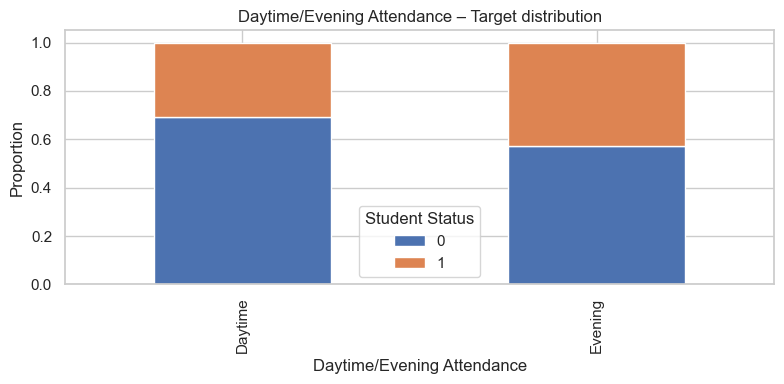


 Previous Qualification vs Student Status (row %)


Student Status,0,1
Previous Qualification,,
10th year,0.000,1.000
10th year—not completed,0.500,0.500
11th year—not completed,0.250,0.750
12th year—not completed,0.000,1.000
Basic education 2nd cycle,0.571,0.429
Basic education 3rd cycle,0.358,0.642
Frequency of higher education,0.562,0.438
Higher education—bachelor’s degree,0.304,0.696
Higher education—degree,0.405,0.595


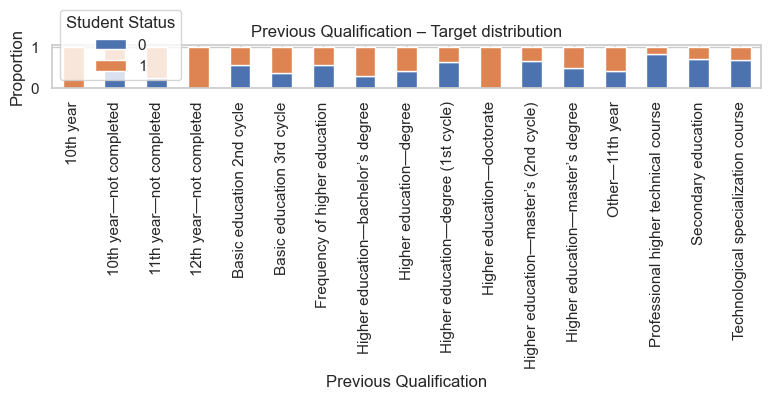


 Nationality vs Student Status (row %)


Student Status,0,1
Nationality,,
Angolan,0.500,0.500
Brazilian,0.632,0.368
Cape Verdean,0.692,0.308
Colombian,0.000,1.000
Cuban,1.000,0.000
Dutch,1.000,0.000
English,1.000,0.000
German,1.000,0.000
Guinean,0.800,0.200


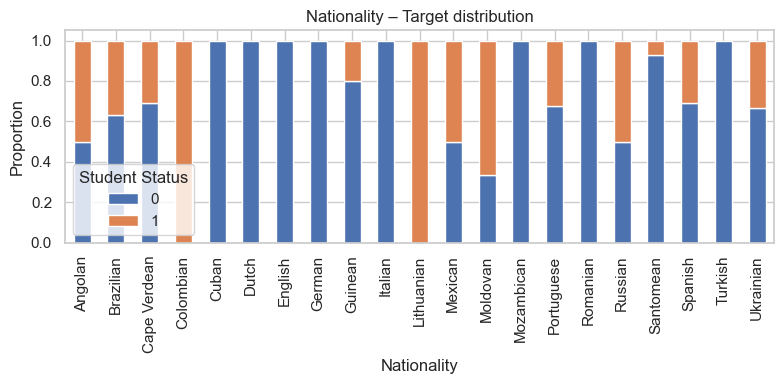


 Mother's Qualification vs Student Status (row %)


Student Status,0,1
Mother's Qualification,,
10th Year,0.000,1.000
11th Year—not completed,0.333,0.667
12th Year—not completed,0.375,0.625
2nd cycle general high school,0.262,0.738
2nd year complementary,0.500,0.500
7th Year (Old),0.333,0.667
7th year,0.667,0.333
8th year,0.333,0.667
9th—not completed,0.333,0.667


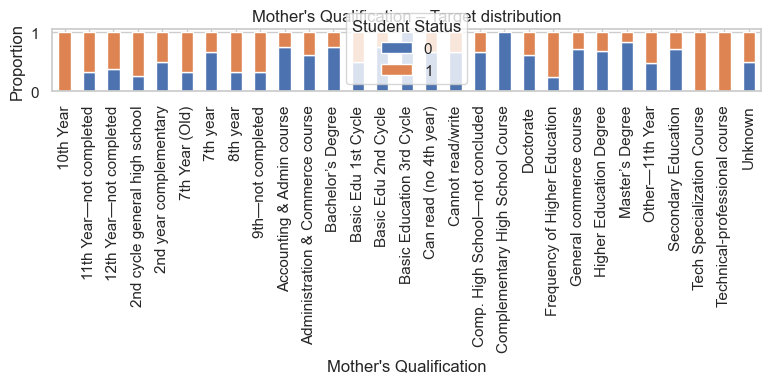


 Father's Qualification vs Student Status (row %)


Student Status,0,1
Father's Qualification,,
10th Year,0.750,0.250
11th Year—not completed,0.000,1.000
12th Year—not completed,0.800,0.200
2nd cycle general high school,0.000,1.000
2nd year complementary,0.000,1.000
7th Year (Old),0.600,0.400
7th year,0.500,0.500
8th year,0.750,0.250
9th—not completed,0.000,1.000


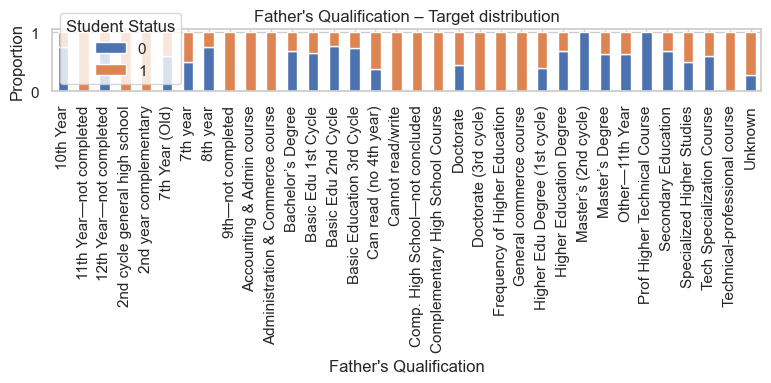


 Mother's Occupation vs Student Status (row %)


Student Status,0,1
Mother's Occupation,,
Admin/Commercial Directors,1.000,0.000
Administrative Staff,0.696,0.304
Armed Forces,0.750,0.250
Armed Forces Officers,1.000,0.000
Armed Forces Sergeants,0.714,0.286
Blank,0.235,0.765
Care Workers,0.909,0.091
Farmers/Ag Workers,0.714,0.286
Finance/Admin Specialists,1.000,0.000


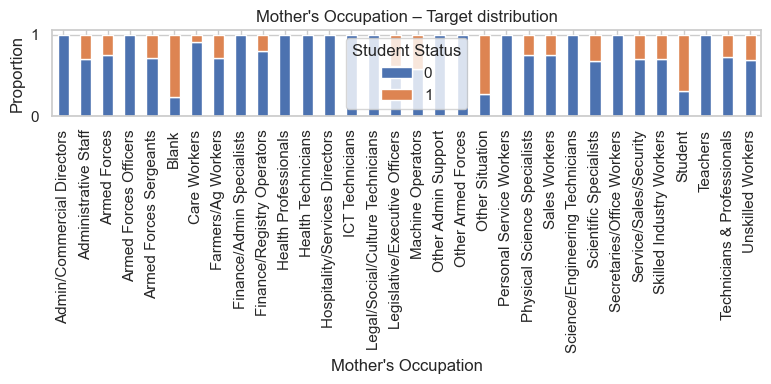


 Father's Occupation vs Student Status (row %)


Student Status,0,1
Father's Occupation,,
Admin/Commercial Directors,0.500,0.500
Administrative Staff,0.640,0.360
Armed Forces,0.680,0.320
Armed Forces Officers,1.000,0.000
Armed Forces Sergeants,1.000,0.000
Assembly Workers,1.000,0.000
Blank,0.316,0.684
Care Workers,1.000,0.000
Construction Workers,1.000,0.000


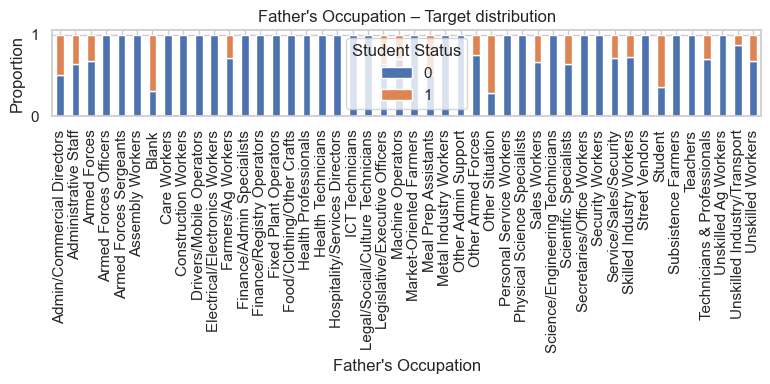

In [121]:
def cat_target_table(col):
    tab = pd.crosstab(df_clean[col], df_clean[target_col],
                      normalize='index').round(3)
    print(f"\n {col} vs {target_col} (row %)")
    display(tab)

    tab.plot(kind='bar', stacked=True, figsize=(8, 4))
    plt.title(f"{col} – Target distribution")
    plt.ylabel("Proportion")
    plt.legend(title=target_col)
    plt.tight_layout()
    plt.show()

for col in cat_cols:
    cat_target_table(col)

### Traing ML Models

Top Features Selected: ['ApprovalRate_2nd', 'Overall_ApprovalRate', 'Approved_Units_2nd_Sem_', 'Average_Grade_2nd_Sem_', 'Total_Approved'] ...

Training Models...

--- Random Forest ---
Accuracy: 0.8621
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       569
           1       0.86      0.73      0.79       316

    accuracy                           0.86       885
   macro avg       0.86      0.83      0.84       885
weighted avg       0.86      0.86      0.86       885


--- XGBoost ---
Accuracy: 0.8554
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       569
           1       0.85      0.72      0.78       316

    accuracy                           0.86       885
   macro avg       0.85      0.83      0.84       885
weighted avg       0.86      0.86      0.85       885


--- LightGBM ---
Accuracy: 0.8644
              precision    recall  f1-score   support

           0       

c:\Python38-32\Lib\site-packages\xgboost\training.py:199: UserWarning: [00:19:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\mahes\AppData\Local\Temp\ipykernel_920\4207668054.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='magma')


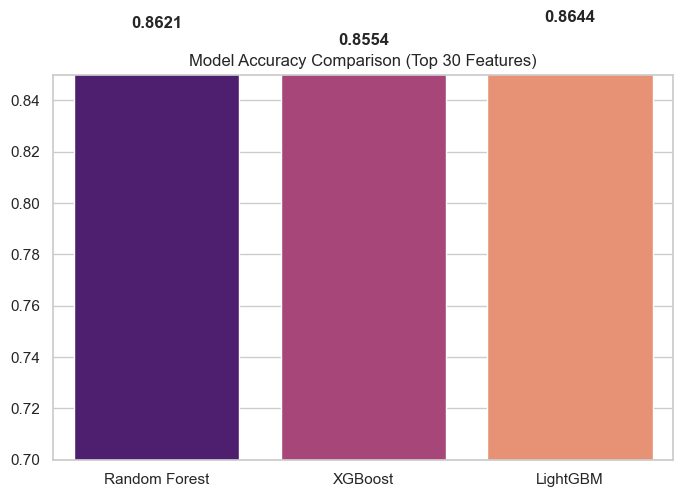


 WINNER: LightGBM with 0.8644 Accuracy


In [ ]:
import re

df_model = df.copy()

# Encode Categorical Variables
le = LabelEncoder()
categorical_cols = df_model.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_model[col] = le.fit_transform(df_model[col].astype(str))

df_model.columns = [re.sub(r'[^A-Za-z0-9_]+', '_', str(col)) for col in df_model.columns]
# Split X and y
X = df_model.drop('Student_Status', axis=1)
y = df_model['Student_Status'].astype(int)

# FEATURE SELECTION (TOP 30)
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_selector.fit(X, y)

feature_importances = pd.Series(rf_selector.feature_importances_, index=X.columns)
top_30_features = feature_importances.nlargest(30).index.tolist()
print(f"Top Features Selected: {top_30_features[:5]} ...")

# Filter dataset to only top 30
X_top30 = X[top_30_features]

# MODEL TRAINING & EVALUATION
X_train, X_test, y_train, y_test = train_test_split(X_top30, y, test_size=0.2, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1)
}

results = {}

print("\nTraining Models...")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# Comparison Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='magma')
plt.title('Model Accuracy Comparison (Top 30 Features)')
plt.ylim(0.7, 0.85)
for i, v in enumerate(results.values()):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', va='bottom', fontweight='bold')
plt.show()

best_model = max(results, key=results.get)
print(f"\n WINNER: {best_model} with {results[best_model]:.4f} Accuracy")

## Training Models

### Random Forest

### XGBoost